In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
raw_data = pd.read_csv("../Data/churn.csv")

In [5]:
raw_data = raw_data.drop("RowNumber", axis=1)

In [6]:
raw_data.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [7]:
raw_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
raw_data.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
#dropping unneccary columns.
raw_data = raw_data.drop(['CustomerId', 'Surname'], axis=1)

In [10]:
    if ~raw_data.isnull().values.any():
        print("There are no null values in the entire dataframe")

There are no null values in the entire dataframe


In [11]:
#finding the category of the features.
for col in raw_data.columns:
    print(f'Unique values in the column {col}: {raw_data[col].nunique()}')

Unique values in the column CreditScore: 460
Unique values in the column Geography: 3
Unique values in the column Gender: 2
Unique values in the column Age: 70
Unique values in the column Tenure: 11
Unique values in the column Balance: 6382
Unique values in the column NumOfProducts: 4
Unique values in the column HasCrCard: 2
Unique values in the column IsActiveMember: 2
Unique values in the column EstimatedSalary: 9999
Unique values in the column Exited: 2


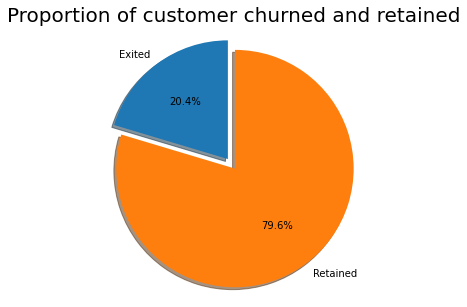

In [12]:
labels = 'Exited', 'Retained'
sizes = [raw_data.Exited[raw_data['Exited']==1].count(), raw_data.Exited[raw_data['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(5, 5))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

In [13]:
raw_data.to_csv('../Data/cleaned_data.csv', index=False)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 <a list of 13 Text major ticklabel objects>)

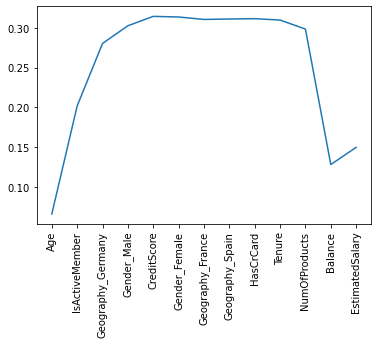

In [25]:
l1 = ['Age', 'IsActiveMember', 'Geography_Germany', 'Gender_Male', 'CreditScore', 'Gender_Female', 'Geography_France', 'Geography_Spain', 'HasCrCard', 'Tenure', 'NumOfProducts', 'Balance', 'EstimatedSalary']
l2 = [0.06580829756795423, 0.20170454545454544, 0.28042328042328046, 0.3026481715006305, 0.31446540880503143, 0.31367628607277287, 0.3106060606060606, 0.3111668757841907, 0.31155778894472363, 0.30982367758186397, 0.29846938775510207, 0.12809315866084423, 0.14971751412429377]
plt.plot(l1, l2)
plt.xticks(rotation=90)



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

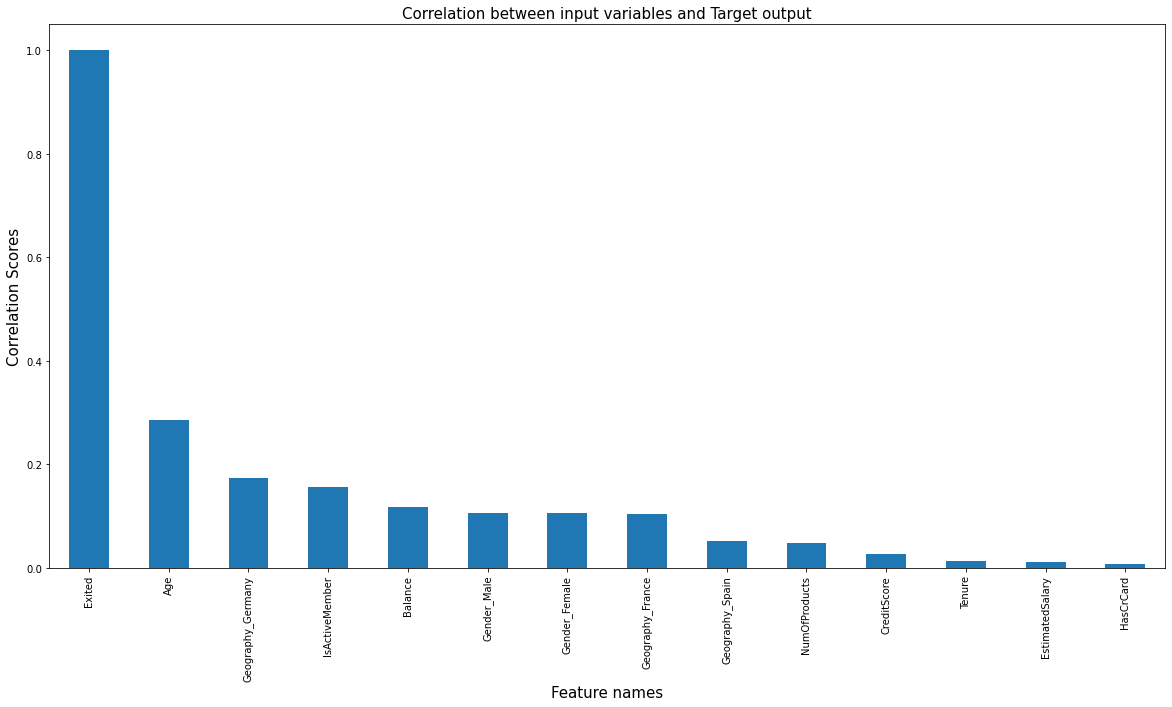

In [30]:
data = pd.read_csv("../Data/engineered_data.csv")
plt.figure(figsize=(20,10))
ax = data.corr()['Exited'].abs().sort_values(ascending = False)
ax.plot(kind='bar')
plt.title('Correlation between input variables and Target output', fontsize=15)
plt.xlabel("Feature names", fontsize=15)
plt.ylabel("Correlation Scores", fontsize=15)          
plt.xticks(rotation=90)